# Visualising NES ROM files
- Linear visualisation vs recursive visualisation with hilbert curves

In [2]:
!pip install -Uqq fastai numpy-hilbert-curve

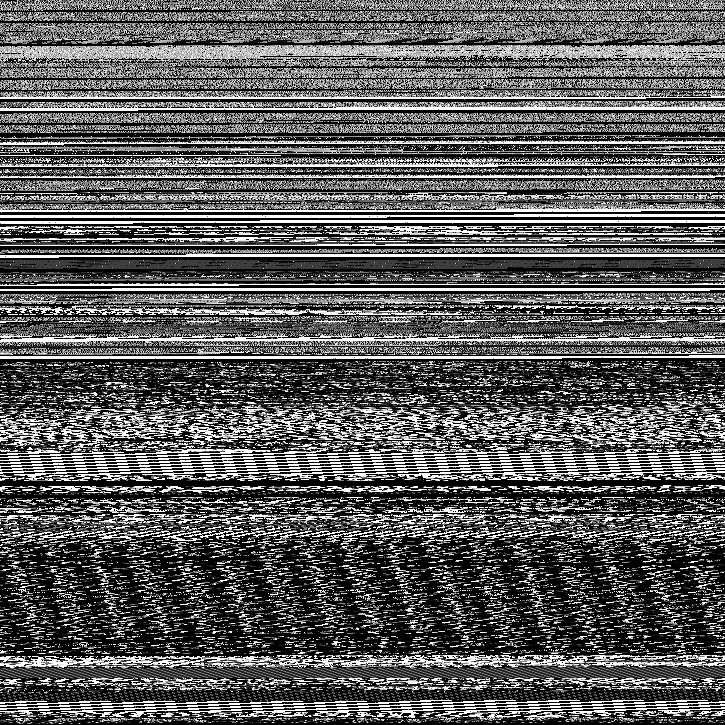

In [8]:
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
import math

download_url('https://archive.org/download/nes-roms/Wario%27s%20Woods%20%28USA%29.nes', 'test.nes', show_progress=False)

# load test nes file
with open('test.nes', 'rb') as f:
    test_bytes = f.read()  # read bytes
    square = math.ceil(math.sqrt(len(test_bytes)))  # round up to nearest square
    test_bytes2 = test_bytes + b'\x00' * (square ** 2 - len(test_bytes))  # pad to make square

Image.frombytes('L', (square, square), test_bytes2)

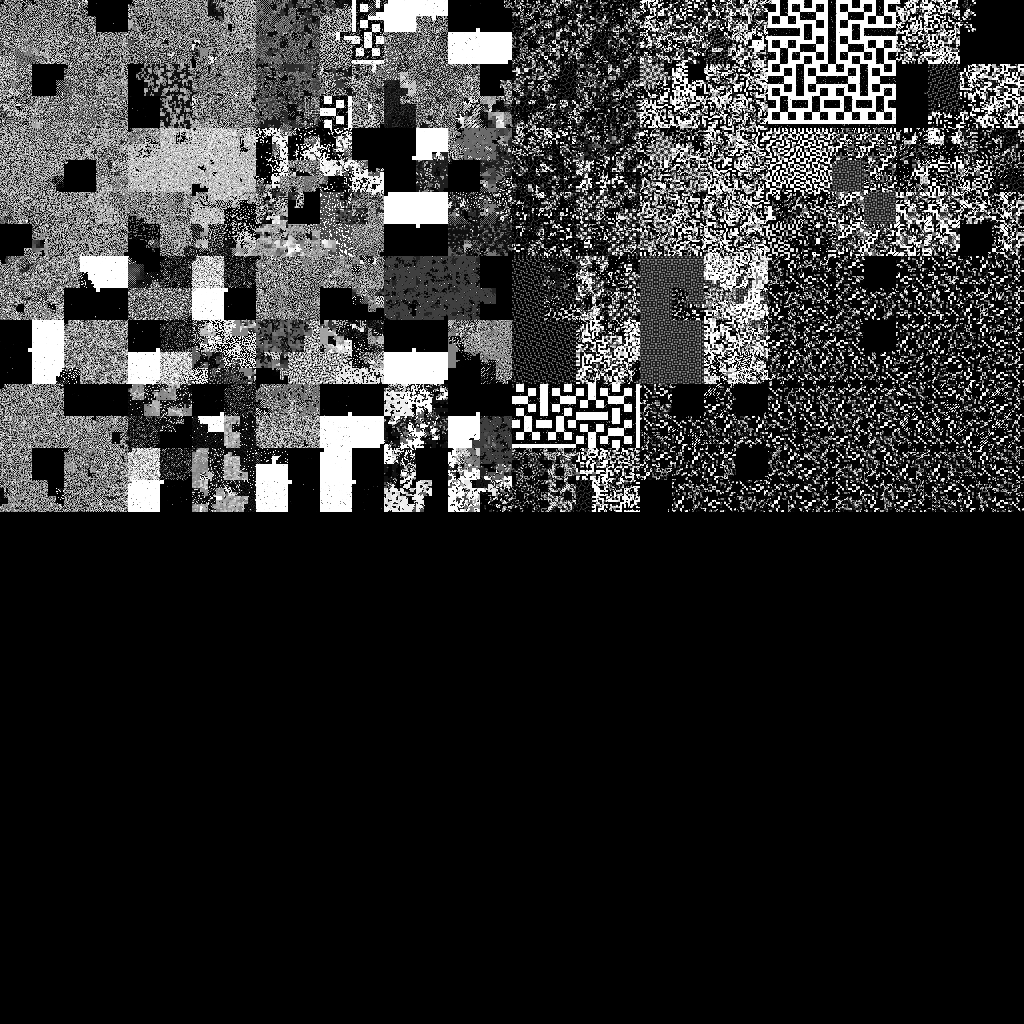

In [15]:
from hilbert import decode, encode

n = math.floor(math.log2(len(test_bytes)))
if 2 ** n != len(test_bytes):
    n += 1
n /= 2
n = int(n)

locs = decode(np.arange(len(test_bytes)), 2, n)
remapped = np.zeros((2**n, 2**n), dtype=np.uint8)

for i, x in enumerate(locs):
    remapped[x[0], x[1]] = test_bytes[i]

Image.fromarray(remapped, mode='L')

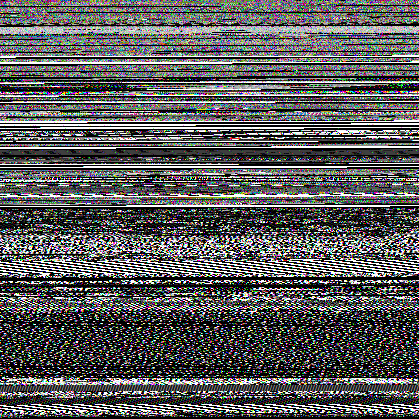

In [10]:
# load test nes file
with open('test.nes', 'rb') as f:
    test_bytes = bytearray(f.read())  # read bytes
    while len(test_bytes) % 3 != 0:  # pad all values to be "whole" pixels
        test_bytes.append(0)
    pix_num = len(test_bytes) // 3
    square = math.ceil(math.sqrt(pix_num))  # round up to nearest square
    test_bytes2 = bytes(test_bytes) + b'\x00\x00\x00' * (square ** 2 - pix_num)  # pad to make square

Image.frombytes('RGB', (square, square), test_bytes2)

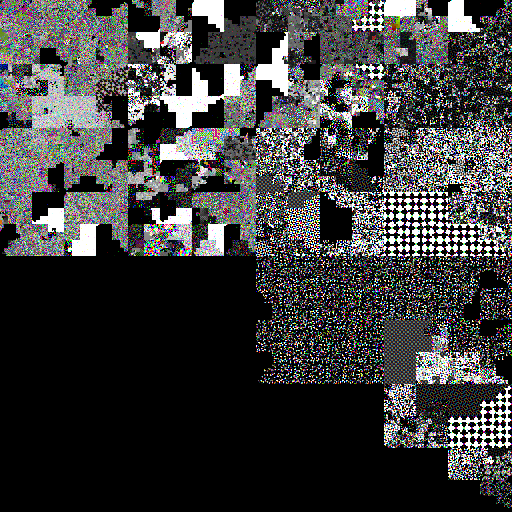

In [13]:
n = math.floor(math.log2(pix_num))
if 2 ** n != pix_num:
    n += 1
n /= 2
n = int(n)

locs = decode(np.arange(pix_num), 2, n)
remapped = np.zeros((2**n, 2**n, 3), dtype=np.uint8)

for i, x in enumerate(locs):
    remapped[x[0], x[1], 0] = test_bytes[i*3]
    remapped[x[0], x[1], 1] = test_bytes[i*3+1]
    remapped[x[0], x[1], 2] = test_bytes[i*3+2]

Image.fromarray(remapped, mode='RGB')